In [21]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 

In [22]:
df = pd.read_csv("../build-debug/threads10.csv")

In [23]:
df.head(5)

,nQubits,opCount,precision,irregularity,nThreads,memSpd
0,1,16,64,0,10,119.29370
1,1,16,64,1,10,118.53230
2,2,64,64,0,10,120.46680
3,2,64,64,1,10,119.85630
4,3,256,64,0,10,87.80578


Text(0, 0.5, '1 / Mem Update Speed (GiBps)')

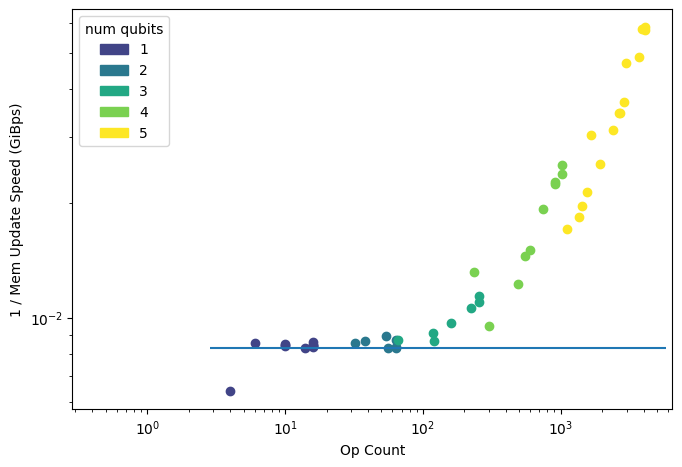

In [51]:
import matplotlib.patches as mpatches

color_map = plt.get_cmap("viridis")
N = 6
colors = [color_map(i / (N - 1)) for i in range(N)]

fig = plt.figure(figsize=(6, 4))
ax_main : plt.Axes = fig.add_axes([0, 0, 1.0, 1.0])
# ax_legend : plt.Axes = fig.add_axes([0.8, 0.0, 0.2, 1.0])

# ax_legend.axis("off")

ax_main.set_xscale("log")
ax_main.set_yscale('log')
handles = []
for nQubit in df['nQubits'].unique():
  sub_df = df.query("nQubits == @nQubit")
  ax_main.scatter(sub_df["opCount"], sub_df["memSpd"] ** -1, color=colors[nQubit])
  handles.append(mpatches.Patch(color=colors[nQubit], label=nQubit))

ax_main.hlines(120.0 ** -1, *plt.xlim())

ax_main.legend(handles=handles, title="num qubits")
ax_main.set_xlabel("Op Count")
ax_main.set_ylabel("1 / Mem Update Speed (GiBps)")
